<a href="https://colab.research.google.com/github/JDonahue44/Project-2---NBA-2016-Draft/blob/main/Project_2_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(display='diagram')
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
filename = '/content/2016_nba_draft_combine.csv'

In [71]:
df = pd.read_csv(filename)
df

,Unnamed: 0,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint
0,0,A.J. English,2016,NaN,74.00,75.00,82.00,98.5,35.5,134.0,29.5,128.0,182.0,5.3,8.75,8.50,NaN,12.27,3.28
1,1,Ben Bentil,2016,51.0,79.25,80.25,85.50,105.0,33.0,138.0,29.0,134.0,229.0,9.7,9.50,10.00,NaN,11.16,3.30
2,2,Brice Johnson,2016,25.0,81.00,82.50,84.50,106.5,38.0,144.5,33.5,140.0,209.0,7.5,9.00,8.25,NaN,11.88,3.20
3,3,Buddy Hield,2016,6.0,75.75,77.00,81.25,101.0,NaN,NaN,NaN,NaN,212.0,6.1,8.50,9.00,NaN,NaN,NaN
4,4,Caleb Swanigan,2016,NaN,79.50,80.50,87.50,107.0,29.0,136.0,26.0,133.0,247.0,12.6,9.00,10.25,NaN,12.80,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,56,Troy Williams,2016,NaN,77.75,78.75,80.25,102.0,36.0,138.0,30.0,132.0,218.0,10.0,8.25,9.25,NaN,10.72,3.35
57,57,Tyler Ulis,2016,34.0,68.75,70.00,74.00,88.5,38.0,126.5,32.5,121.0,149.0,5.2,7.50,7.50,NaN,10.80,3.20
58,58,Wade Baldwin,2016,17.0,74.50,76.00,83.25,100.0,38.0,138.0,32.5,132.5,202.0,5.2,9.00,9.75,NaN,10.45,3.19
59,59,Wayne Selden,2016,NaN,76.25,77.75,82.50,101.0,NaN,NaN,NaN,NaN,232.0,7.3,9.00,9.25,NaN,NaN,NaN


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                61 non-null     int64  
 1   Player                    61 non-null     object 
 2   Year                      61 non-null     int64  
 3   Draft pick                38 non-null     float64
 4   Height (No Shoes)         61 non-null     float64
 5   Height (With Shoes)       61 non-null     float64
 6   Wingspan                  61 non-null     float64
 7   Standing reach            61 non-null     float64
 8   Vertical (Max)            49 non-null     float64
 9   Vertical (Max Reach)      49 non-null     float64
 10  Vertical (No Step)        49 non-null     float64
 11  Vertical (No Step Reach)  49 non-null     float64
 12  Weight                    60 non-null     float64
 13  Body Fat                  60 non-null     float64
 14  Hand (Length

In [73]:
df.duplicated().sum()

0

In [74]:
df = df.drop('Unnamed: 0', axis = 1)
print(df.head())

           Player  Year  Draft pick  Height (No Shoes)  Height (With Shoes)  \
0    A.J. English  2016         NaN              74.00                75.00   
1      Ben Bentil  2016        51.0              79.25                80.25   
2   Brice Johnson  2016        25.0              81.00                82.50   
3     Buddy Hield  2016         6.0              75.75                77.00   
4  Caleb Swanigan  2016         NaN              79.50                80.50   

   Wingspan  Standing reach  Vertical (Max)  Vertical (Max Reach)  \
0     82.00            98.5            35.5                 134.0   
1     85.50           105.0            33.0                 138.0   
2     84.50           106.5            38.0                 144.5   
3     81.25           101.0             NaN                   NaN   
4     87.50           107.0            29.0                 136.0   

   Vertical (No Step)  Vertical (No Step Reach)  Weight  Body Fat  \
0                29.5                    

In [75]:
df = df.drop('Year', axis = 1)
print(df.head())

           Player  Draft pick  Height (No Shoes)  Height (With Shoes)  \
0    A.J. English         NaN              74.00                75.00   
1      Ben Bentil        51.0              79.25                80.25   
2   Brice Johnson        25.0              81.00                82.50   
3     Buddy Hield         6.0              75.75                77.00   
4  Caleb Swanigan         NaN              79.50                80.50   

   Wingspan  Standing reach  Vertical (Max)  Vertical (Max Reach)  \
0     82.00            98.5            35.5                 134.0   
1     85.50           105.0            33.0                 138.0   
2     84.50           106.5            38.0                 144.5   
3     81.25           101.0             NaN                   NaN   
4     87.50           107.0            29.0                 136.0   

   Vertical (No Step)  Vertical (No Step Reach)  Weight  Body Fat  \
0                29.5                     128.0   182.0       5.3   
1       

In [76]:
df = df.drop('Height (With Shoes)', axis = 1)
print(df.head())

           Player  Draft pick  Height (No Shoes)  Wingspan  Standing reach  \
0    A.J. English         NaN              74.00     82.00            98.5   
1      Ben Bentil        51.0              79.25     85.50           105.0   
2   Brice Johnson        25.0              81.00     84.50           106.5   
3     Buddy Hield         6.0              75.75     81.25           101.0   
4  Caleb Swanigan         NaN              79.50     87.50           107.0   

   Vertical (Max)  Vertical (Max Reach)  Vertical (No Step)  \
0            35.5                 134.0                29.5   
1            33.0                 138.0                29.0   
2            38.0                 144.5                33.5   
3             NaN                   NaN                 NaN   
4            29.0                 136.0                26.0   

   Vertical (No Step Reach)  Weight  Body Fat  Hand (Length)  Hand (Width)  \
0                     128.0   182.0       5.3           8.75          8.50

In [77]:
df = df.drop('Bench', axis = 1)
print(df.head())

           Player  Draft pick  Height (No Shoes)  Wingspan  Standing reach  \
0    A.J. English         NaN              74.00     82.00            98.5   
1      Ben Bentil        51.0              79.25     85.50           105.0   
2   Brice Johnson        25.0              81.00     84.50           106.5   
3     Buddy Hield         6.0              75.75     81.25           101.0   
4  Caleb Swanigan         NaN              79.50     87.50           107.0   

   Vertical (Max)  Vertical (Max Reach)  Vertical (No Step)  \
0            35.5                 134.0                29.5   
1            33.0                 138.0                29.0   
2            38.0                 144.5                33.5   
3             NaN                   NaN                 NaN   
4            29.0                 136.0                26.0   

   Vertical (No Step Reach)  Weight  Body Fat  Hand (Length)  Hand (Width)  \
0                     128.0   182.0       5.3           8.75          8.50

In [78]:
df.isna().sum()

Player                       0
Draft pick                  23
Height (No Shoes)            0
Wingspan                     0
Standing reach               0
Vertical (Max)              12
Vertical (Max Reach)        12
Vertical (No Step)          12
Vertical (No Step Reach)    12
Weight                       1
Body Fat                     1
Hand (Length)                0
Hand (Width)                 0
Agility                     12
Sprint                      13
dtype: int64

In [79]:
X = df.drop(columns=['Wingspan'])
y = df['Wingspan']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [81]:
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

In [82]:
num_columns = num_selector(X_train)
cat_columns = cat_selector(X_train)

In [83]:
print('numeric columns are', num_columns)
print('categorical columns are', cat_columns)

numeric columns are ['Draft pick', 'Height (No Shoes)', 'Standing reach', 'Vertical (Max)', 'Vertical (Max Reach)', 'Vertical (No Step)', 'Vertical (No Step Reach)', 'Weight', 'Body Fat', 'Hand (Length)', 'Hand (Width)', 'Agility', 'Sprint']
categorical columns are ['Player']


In [94]:
mean_imputer = SimpleImputer(strategy = 'mean')
mean_imputer.fit(X_train[num_columns])

SimpleImputer()

In [95]:
X_train.loc[:, num_columns] = mean_imputer.transform(X_train[num_columns])
X_test.loc[:, num_columns] = mean_imputer.transform(X_test[num_columns])

In [96]:
constant_imputer = SimpleImputer(strategy='constant', fill_value = 'missing')
constant_imputer.fit(X_train[cat_columns])

SimpleImputer(fill_value='missing', strategy='constant')

In [97]:
X_train.loc[:, cat_columns] = constant_imputer.transform(X_train[cat_columns])
X_test.loc[:, cat_columns] = constant_imputer.transform(X_test[cat_columns])

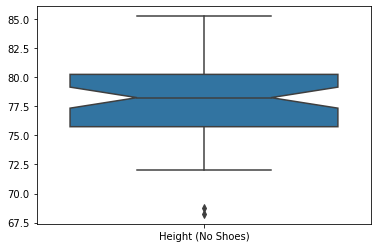

In [100]:
sns.boxplot(data = df.loc[:, ['Height (No Shoes)']], notch = True)

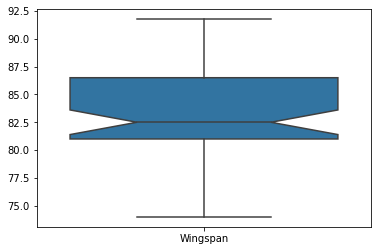

In [101]:
sns.boxplot(data = df.loc[:, ['Wingspan']], notch = True)

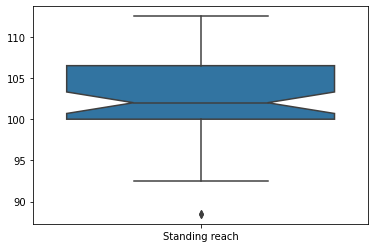

In [102]:
sns.boxplot(data = df.loc[:, ['Standing reach']], notch = True)

<function matplotlib.pyplot.show>

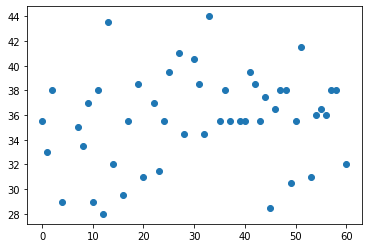

In [105]:
plt.scatter(df.index,df['Vertical (Max)'])
plt.show

<function matplotlib.pyplot.show>

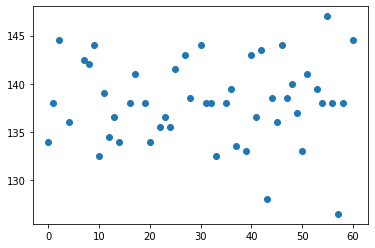

In [106]:
plt.scatter(df.index,df['Vertical (Max Reach)'])
plt.show

<function matplotlib.pyplot.show>

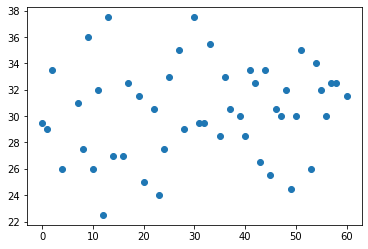

In [107]:
plt.scatter(df.index,df['Vertical (No Step)'])
plt.show

<function matplotlib.pyplot.show>

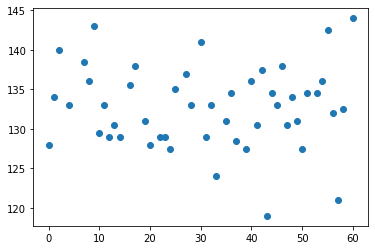

In [108]:
plt.scatter(df.index,df['Vertical (No Step Reach)'])
plt.show

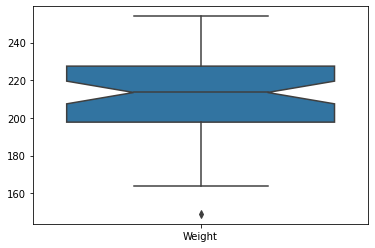

In [109]:
sns.boxplot(data = df.loc[:, ['Weight']], notch = True)

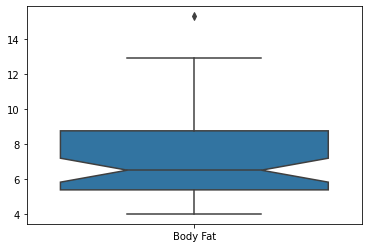

In [110]:
sns.boxplot(data = df.loc[:, ['Body Fat']], notch = True)

<function matplotlib.pyplot.show>

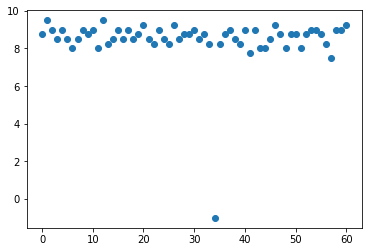

In [111]:
plt.scatter(df.index,df['Hand (Length)'])
plt.show

<function matplotlib.pyplot.show>

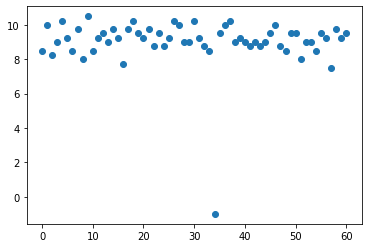

In [112]:
plt.scatter(df.index,df['Hand (Width)'])
plt.show

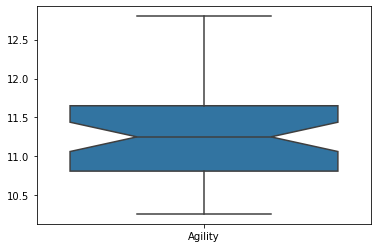

In [113]:
sns.boxplot(data = df.loc[:, ['Agility']], notch = True)

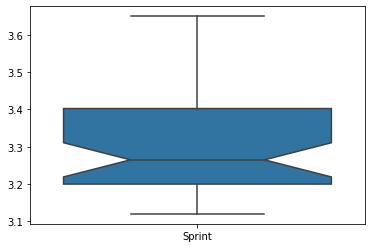

In [114]:
sns.boxplot(data = df.loc[:, ['Sprint']], notch = True)

The First step I took was to drop import my dataset. I shortly followed that step with the decision to drop columns from my dataset that weren't relevant to my data including: Unnamed: 0, Year, Height (With Shoes) & Bench. I decided to use these imputers in my data because I didn't want these missing pieces of data to skew what I was working with. As I was going through my data visualizations, a couple of outliers stood out to me : Body Fat & Height with no shoes. It was interesting to see the variation of the plyer body types that were drafted in this data set.